# Teknisk Tirsdag: Supervised Learning

I denne opgave skal vi bruge Logistisk Regression til at forudsige hvilke danske fodboldspillere der egentlig kunne spille for en storklub.

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Kolonnenavn: Name                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Age                  antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Nationality          antal fyldte felter: 17981     datatype: object
Kolonnenavn: Overall              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Potential            antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Club                 antal fyldte felter: 17733     datatype: object
Kolonnenavn: Value                antal fyldte felter: 17981     datatype: object
Kolonnenavn: Wage                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Special              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Acceleration         antal fyldte felter: 17981     datatype: object
Kolonnenavn: Aggression           antal fyldte felter: 17981     datatype: object
Kolonnenavn: Agility              antal fyldte felter: 17981     datatype: object
Kolonnenavn: Balance

Teknisk Tirsdag - Data Cleaning.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "markdown",
Teknisk Tirsdag - Data Cleaning.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
Teknisk Tirsdag - Data Cleaning.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [


Variablenavn: Name                 Variabletype: object
Variablenavn: Age                  Variabletype: int64
Variablenavn: Nationality          Variabletype: object
Variablenavn: Overall              Variabletype: int64
Variablenavn: Potential            Variabletype: int64
Variablenavn: Club                 Variabletype: object
Variablenavn: Value                Variabletype: float64
Variablenavn: Wage                 Variabletype: float64
Variablenavn: Special              Variabletype: int64
Variablenavn: Acceleration         Variabletype: float64
Variablenavn: Aggression           Variabletype: float64
Variablenavn: Agility              Variabletype: float64
Variablenavn: Balance              Variabletype: float64
Variablenavn: Ball control         Variabletype: float64
Variablenavn: Composure            Variabletype: float64
Variablenavn: Crossing             Variabletype: float64
Variablenavn: Curve                Variabletype: float64
Variablenavn: Dribbling            Variabl

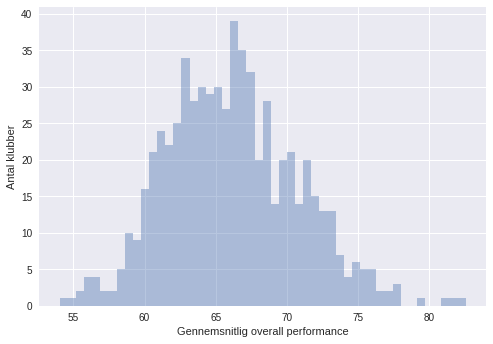

Træningsæt størrelse: 1272


In [1]:
# Run the datacleaning notebook to get all the variables
%run 'Teknisk Tirsdag - Data Cleaning.ipynb'

Efter at have hentet vores rensede data, hvor vi minder os selv om at vi har: <br>
* dansker_set
* topklub_set
* ikke_topklub_set
* overall_set 

Det første, vi gerne vil kigge lidt på, er, om vi var grundige nok i vores foranalyse. Derfor laver vi et heatmap, der skal fortælle os hvor stor sammenhængen er (korrelation) mellem kolonnerne i forhold til hinanden.

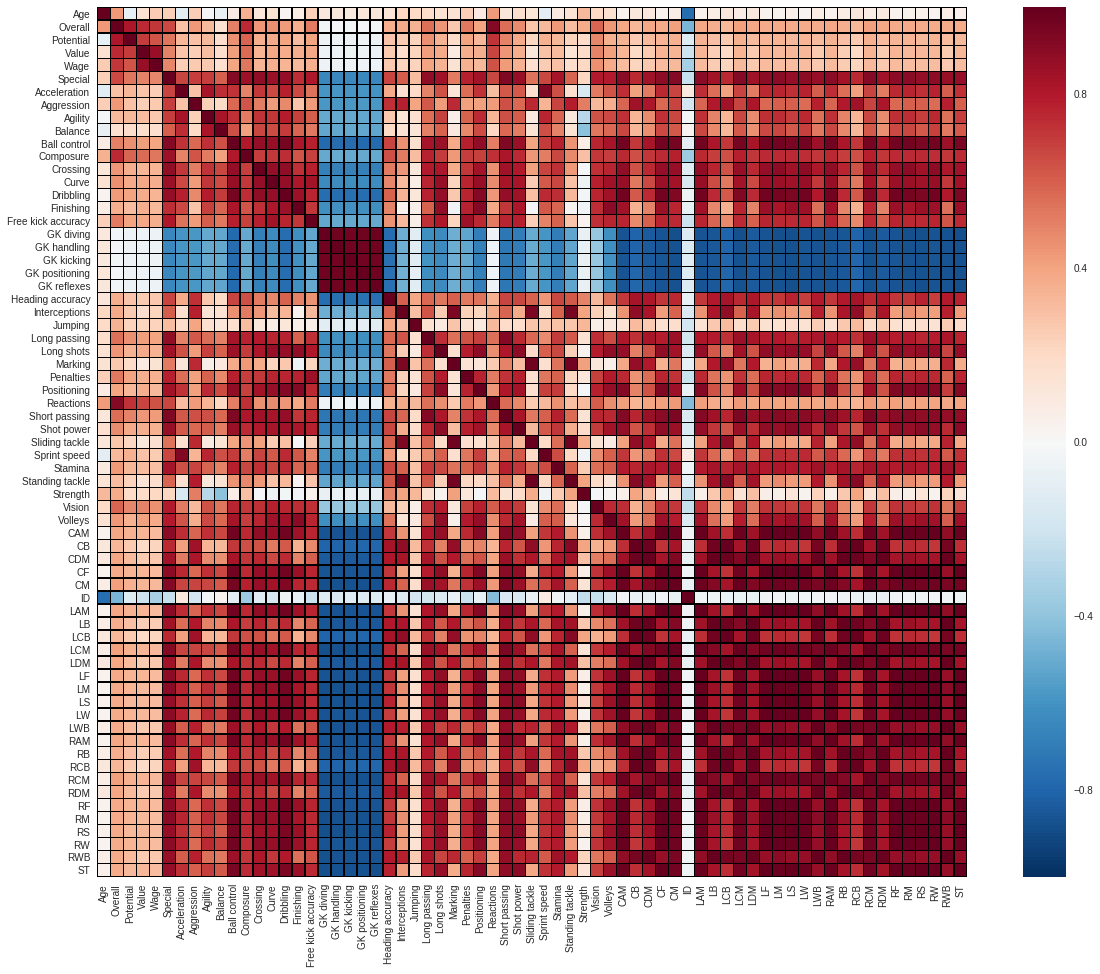

In [2]:
corr = overall_set.corr()

fig = plt.figure(figsize=(20, 16))
ax = sb.heatmap(corr, xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                linewidths=0.25, vmax=1.0, square=True,
                linecolor='black', annot=False
               )
plt.show()

Hvad vi ser her, er en korrelationsmatrix. Jo mørkere farver, des højere korrelation, rød for positiv- og blå for negativ-korrelation. <br>
Vi ser altså at der er høj korrelation, i vores nedre højre hjørne; Dette er spilpositionerne. Vi ser også et stort blåt kryds, som er målmandsdata. Disse har meget negativ korrelation med resten af vores datasæt. (Dobbeltklik evt. på plottet, hvis det er meget svært at læse teksten)<br>
Derudover kan vi se, at ID kolonnen slet ikke korrelere. Man kan derfor vælge at tage den ud.

Vi tilføjer nu vores "kendte" labels til vores data. (Hvis man spiller for en af vores topklubber, får man et 1-tal, og ellers får man et 0) <br>
Vi deler også vores træningssæt op i en *X* matrix med alle vores numeriske features, og en *y* vektor med alle vores labels.

In [3]:
overall_set['label'] = overall_set['Club'].isin(topklub_set.Club).astype(int)
y = overall_set['label']
X = overall_set.iloc[:,0:-1].select_dtypes(include=['float64', 'int64'])

Vi kan kigge lidt overordnet på tallene mellem de 2 klasser.

In [4]:
overall_set.groupby('label').mean()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
label,,,,,,,,,,,,,,,,,,,,,
0,25.026730,65.619497,70.600629,1.655747e+06,9361.635220,1571.663522,63.682390,54.246855,62.617925,62.869497,...,49.207547,47.996855,50.830189,49.125786,51.566038,52.295597,51.045597,51.738994,49.856918,51.045597
1,25.166667,77.099057,81.856918,1.630118e+07,71496.855346,1817.268868,69.382075,62.413522,68.784591,66.122642,...,58.400943,56.378931,61.515723,58.900943,61.589623,62.281447,60.044025,61.707547,59.371069,60.044025


### Observationer
* Alderen siger ikke rigtig noget om, hvorvidt du spiller for en topklub eller ej
* Topklubsspillere er i gennemsnittet en faktor 10 mere værd end ikke-topklub spillere
* Topklubsspillere er i gennemsnittet generelt ca. 10+ på alt i forhold til ikke-topklub spillere

Vi er nu klar til at gå i gang med vores første Machine Learning algoritme.
På forhånd ved vi, at der i vores træningssæt er {{y.where(y==1).count()}} som spiller i topklubber, og {{y.where(y==0).count()}} der ikke gør. <br>
Der er en 50/50 chance for at ramme rigtigt, hvis man bare gætte tilfældigt. Vi håber derfor, at algoritmen kan slå den 50% svarrate.

## Logistisk regression

In [5]:
# hent nødvendige pakker fra Scikit Learn biblioteket (generelt super hvis man vil lave data science)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Vi fitter nu en logistic regression classifier til vores data, og fitter en model, så den kan genkende om man spiller for en topklub eller ej, og evaluere resultatet:

In [6]:
model = LogisticRegression()
model = model.fit(X,y)

model.score(X,y)

0.83411949685534592

Altså har vores model ret i 
{{'{:.0f}'.format(100*model.score(X, y))}}% af tiden i træningssættet. <br>

Pretty good!! Den har altså fundet nogle mønstre der kan mappe data til labels, og gætter ikke bare.

Men vi kan ikke vide, om den har overfittet, og derved har tilpasset sig for godt til sit kendte data, så nyt data vil blive fejlmappet. <br>
Hvad vi kan prøve, er at splitte vores træningssæt op i et trænings- og testsæt. På den måde kan vi først fitte og derefter evaluere på "nyt" kendt data, om den stadig performer som forventet. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Træningsæt størrelse: {} - Testsæt størrelse: {}'.format(len(X_train), len(X_test)))

Træningsæt størrelse: 1017 - Testsæt størrelse: 255


Og vi er nu klar til at prøve igen!

## Logistisk regression 2.0
Igen fitter vi en logistisk regression til vores træningsdata, og danner en model, men denne gang uden at bruge testdatasættet.

In [8]:
model2 = LogisticRegression()
model2 = model2.fit(X_train, y_train)
model2.score(X_train, y_train)

0.82595870206489674

Modellen matcher nu 
{{'{:.0f}'.format(100*model2.score(X, y))}}% af tiden i træningssættet. <br> 
Men har den overfittet?

### Evaluering af modellen
Vi genererer derfor vores *y* forudsigelse og også sandsynlighederne for vores testsæt, da disse bruges til at evaluere modellen.

In [9]:
y_pred = model2.predict(X_test)
y_probs = model2.predict_proba(X_test)

In [10]:
# Evalueringsmålinger
from sklearn import metrics
print('Nøjagtigheden af vores logistiske regressions models prediction på testsættet er {:.0f}'.format(100*metrics.accuracy_score(y_test, y_pred))+'%', '\n')
print('Arealet under vores ROC AUC kurve er {:.0f}'.format(100*metrics.roc_auc_score(y_test, y_probs[:, 1]))+'%')

Nøjagtigheden af vores logistiske regressions models prediction på testsættet er 84% 

Arealet under vores ROC AUC kurve er 90%


Det ser jo ret fornuftigt ud.<br>

For at sige noget om vores nye model, kan vi også lave en "confusion_matrix"

<img src='http://revolution-computing.typepad.com/.a/6a010534b1db25970b01bb08c97955970d-pi',
    align="center"
    width="40%"
    alt="confusion matrix">
    
T og F står for henholdsvist True og False<br>
P og N står for henholdsvist Positive og Negative

In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[112   9]
 [ 32 102]]


Resultatet fortæller os, at vi har {{confusion_matrix[0,0]}}+{{confusion_matrix[1,1]}} = {{confusion_matrix[0,0]+confusion_matrix[1,1]}} korrekte forudsigelser og {{confusion_matrix[0,1]}}+{{confusion_matrix[1,0]}} = {{confusion_matrix[0,1]+confusion_matrix[1,0]}} ukorrekte

Man kan også bede classifieren om en rapport:

In [12]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.93      0.85       121
          1       0.92      0.76      0.83       134

avg / total       0.85      0.84      0.84       255



### Logistisk regression med krydsvalidering

Vi er egentlig meget tilfredse med vores model, men ofte kan det være en god idé at teste på flere små testsæt, og holde dem op mod hinanden. <br>

Her laver vi en 10-folds krydsvalidering og får altså 10 scorer ud:

In [13]:
# 10-folds cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores,'\n')
print(scores.mean())

[ 0.9296875   0.9453125   0.9140625   0.921875    0.9765625   0.9375
  0.94444444  0.74603175  0.46825397  0.44444444] 

0.822817460317


Her preformer modellen altså i gennemsnit 
{{'{:.0f}'.format(100*scores.mean())}}%. 

Det lyder meget lovende, men vi holder os til vores *__model2__* og kan nu prøve modellen af på det rigtige datasæt

# Danskersættet 
Vi skal nu prøve vores model på vores danske spillere<br>

### Opgave:
Vi skal lave prediction og probability på vores danske spillere, ligesom vi gjorde tidligere for testsættet. (Lige under __Evaluering af modellen__)<br>

Husk din dataframe kun må indeholder numeriske værdier, når vi bruger modellen.<br>
Fx. "__df.select_dtypes(include=['float64', 'int64'])__"

In [14]:
dansker_pred = None ### Fjern NONE og UDFYLD MIG ###
dansker_probs = None ### Fjern NONE og UDFYLD MIG ###

Modellen har fundet {{np.bincount(dansker_pred)[0]}} nuller og {{np.bincount(dansker_pred)[1]}} ét-taller

Hvis du satte *top_klub_ratio* til 75 i __Opgave 1__ i __Data Cleaning__, skulle der være omkring 27-28 ét-taller. <br>
*top_klub_ratio* blev sat til: {{top_klub_ratio}}

Vi tilføjer disse kolonner til vores dataframe.

In [18]:
dansker_set_df = dansker_set.copy()
dansker_set_df[['prob1','prob2']] = pd.DataFrame(dansker_probs, index=dansker_set.index)
dansker_set_df['Probabilities [0,1]'] = dansker_set_df[['prob1','prob2']].values.tolist()
dansker_set_df['Prediction'] = pd.Series(dansker_pred, index=dansker_set.index)
del dansker_set_df['prob1'], dansker_set_df['prob2'] 
# dansker_set_df.head()

Og sortere listen, så de bedste danske spillere står øvers, og tilføjer et index, så vi kan få et bedre overblik

In [16]:
dansker_set_df.loc[:,'pred=1'] = dansker_set_df['Probabilities [0,1]'].map(lambda x: x[1]).sort_values(ascending=False)
dansker_sorted = dansker_set_df.sort_values('pred=1', ascending=False)
dansker_sorted = dansker_sorted[['Name', 'Club', 'Overall', 'Potential', 'Probabilities [0,1]', 'Prediction']]
dansker_sorted.loc[:,'in'] = np.arange(1, len(dansker_set_df)+1)
dansker_sorted.set_index('in')

,Name,Club,Overall,Potential,"Probabilities [0,1]",Prediction
in,,,,,,
1,C. Eriksen,Tottenham Hotspur,87,91,"[1.2361997292487104e-07, 0.9999998763800271]",1
2,A. Christensen,Chelsea,81,89,"[0.00595764605638005, 0.99404235394362]",1
3,K. Schmeichel,Leicester City,83,84,"[0.014948898649614573, 0.9850511013503854]",1
4,S. Kjær,Sevilla FC,81,82,"[0.0792499037714689, 0.9207500962285311]",1
5,D. Wass,RC Celta de Vigo,80,80,"[0.08093367436833954, 0.9190663256316605]",1
6,J. Vestergaard,Borussia Mönchengladbach,79,84,"[0.09443758718579498, 0.905562412814205]",1
7,N. Jørgensen,Feyenoord,79,81,"[0.09662360026251093, 0.9033763997374891]",1
8,Y. Poulsen,RB Leipzig,76,83,"[0.11856360569546154, 0.8814363943045385]",1
9,K. Dolberg,Ajax,78,88,"[0.1340973698375778, 0.8659026301624222]",1


Efter flot hattrick mod Irland, kan man vidst ikke være i tvivl om Kong Christian tager pladsen på tronen
<img src='kongen.png',
    align="center"
    width="40%"
    alt="kongen">

Men hvilke danske spillere spiller egentlig for topklubber, og hvordan er de rangeret i forhold til vores model?

In [39]:
dansker_sorted[dansker_sorted['Club'].isin(top_clubs)].set_index('in')

,Name,Club,Overall,Potential,"Probabilities [0,1]",Prediction
in,,,,,,
2,A. Christensen,Chelsea,81,89,"[0.00469680685795848, 0.9953031931420415]",1
7,S. Kjær,Sevilla FC,81,82,"[0.10268761388443448, 0.8973123861155655]",1
17,M. Krohn-Dehli,Sevilla FC,79,79,"[0.32668814694969617, 0.6733118530503038]",1
198,J. Larsen,Borussia Dortmund,62,79,"[0.8181799678362287, 0.18182003216377135]",0
224,R. Corlu,Roma,58,69,"[0.8314270782764579, 0.16857292172354213]",0


Man kan undre sig over hvad Jacob Larsen laver hos stopklubben Borussia Dortmund, men en hurtig googling viser, at han simpelthen blev headhuntet til klubben som 16-årig.

Og så er der jo nok nogen, der vil spørger - Hvad med Bendtner?
Så han skal da også lige have en plads i vores analyse:

In [40]:
dansker_sorted.loc[dansker_sorted.Name == 'N. Bendtner'].set_index('in')

,Name,Club,Overall,Potential,"Probabilities [0,1]",Prediction
in,,,,,,
42,N. Bendtner,Rosenborg BK,73,73,"[0.568000951323095, 0.43199904867690503]",0


# Opgave:
Vi kan også kigge på ham i det store billede. Prøv evt. at lege lidt rundt med forskellige spillere eller andre features.<br>
Er der noget specielt, der kunne være sjovt at kigge på?

In [41]:
df.loc[df.Name == 'N. Bendtner']

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2697,N. Bendtner,29,Denmark,73,73,Rosenborg BK,4000000.0,10000.0,1790,70.0,...,51.0,51.0,65.0,54.0,70.0,69.0,72.0,69.0,53.0,72.0


# Ekstra lege/analyse opgaver


Danske Rezan Corlu som ellers ligger ret lavt selv på potentiale har alligevel sikret sig en plads hos A.S. Roma i en alder af 20 år.
Men hvordan var det egentlig med de topklub spillere? Hvor langt ned kan man gå i potentiale, og stadig spille for en topklub?

In [42]:
top_df = df[df.Club.isin(top_clubs)]
top_df[top_df.Overall < 70].sort_values('Overall', ascending=True)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
17331,A. Zerbin,18,Italy,53,73,Napoli,120000.0,4000.0,1324,42.0,...,39.0,37.0,49.0,41.0,52.0,51.0,51.0,53.0,41.0,51.0
16714,P. Fritsch,18,Germany,55,71,Borussia Dortmund,160000.0,3000.0,1349,52.0,...,49.0,54.0,44.0,50.0,41.0,42.0,42.0,42.0,48.0,42.0
16406,D. Sauerland,20,Germany,56,68,Borussia Dortmund,160000.0,5000.0,1526,55.0,...,46.0,41.0,55.0,47.0,57.0,56.0,53.0,58.0,49.0,53.0
15718,J. Maddox,18,England,58,74,Chelsea,260000.0,7000.0,1402,71.0,...,42.0,34.0,51.0,41.0,56.0,57.0,52.0,57.0,45.0,52.0
15549,R. Corlu,19,Denmark,58,69,Roma,210000.0,4000.0,1473,73.0,...,43.0,34.0,51.0,40.0,56.0,57.0,53.0,58.0,45.0,53.0
15479,T. Bola,18,England,59,72,Arsenal,250000.0,6000.0,1344,59.0,...,54.0,58.0,41.0,50.0,40.0,40.0,42.0,40.0,51.0,42.0
15409,E. Nketiah,18,England,59,80,Arsenal,350000.0,8000.0,1404,77.0,...,37.0,33.0,50.0,37.0,59.0,56.0,58.0,58.0,39.0,58.0
15389,Obama,17,Spain,59,76,Atlético Madrid,300000.0,4000.0,1408,66.0,...,37.0,29.0,48.0,34.0,58.0,56.0,58.0,58.0,40.0,58.0
15341,A. Guarnone,18,Italy,59,74,Milan,260000.0,3000.0,997,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15180,J. Beste,18,Germany,59,78,Borussia Dortmund,290000.0,3000.0,1510,69.0,...,58.0,53.0,52.0,54.0,50.0,55.0,47.0,54.0,59.0,47.0


Vi kan altså se, at der bliver satset på ungdommen, hvor deres kommende potentiale nok taler for deres plads i en storklub.<br>

Men hvad så med ikke-topklubsspillere og deres performance?

In [43]:
bund_df = df[~df.Club.isin(top_clubs)]
bund_df[bund_df.Overall > 70]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
11,K. De Bruyne,26,Belgium,89,92,Manchester City,83000000.0,285000.0,2162,76.0,...,66.0,57.0,84.0,70.0,85.0,85.0,81.0,85.0,71.0,81.0
16,S. Agüero,29,Argentina,89,89,Manchester City,66500000.0,325000.0,2074,90.0,...,52.0,44.0,75.0,54.0,87.0,84.0,86.0,86.0,57.0,86.0
29,H. Lloris,30,France,88,88,Tottenham Hotspur,38000000.0,165000.0,1318,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,C. Eriksen,25,Denmark,87,91,Tottenham Hotspur,65000000.0,165000.0,2064,77.0,...,64.0,53.0,83.0,68.0,82.0,84.0,77.0,83.0,69.0,77.0
42,David Silva,31,Spain,87,87,Manchester City,44000000.0,220000.0,1977,72.0,...,59.0,50.0,81.0,64.0,81.0,82.0,75.0,82.0,65.0,75.0
46,H. Kane,23,England,86,90,Tottenham Hotspur,59000000.0,165000.0,2057,68.0,...,60.0,57.0,74.0,62.0,82.0,78.0,84.0,79.0,62.0,84.0
56,T. Alderweireld,28,Belgium,86,87,Tottenham Hotspur,40500000.0,165000.0,2047,62.0,...,79.0,84.0,74.0,81.0,67.0,67.0,67.0,65.0,77.0,67.0
76,D. Subašić,32,Croatia,85,85,AS Monaco,22000000.0,46000.0,1305,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,K. Glik,29,Poland,85,85,AS Monaco,30000000.0,60000.0,1612,53.0,...,72.0,83.0,55.0,74.0,48.0,50.0,52.0,45.0,68.0,52.0
81,I. Gündoğan,26,Germany,85,87,Manchester City,46000000.0,190000.0,2148,73.0,...,73.0,69.0,83.0,77.0,81.0,81.0,76.0,81.0,75.0,76.0


Måske er de 22 klubber, vi har udvalgt ikke helt nok til at beskrive topklubber

In [44]:
top_clubs

220               FC Barcelona
331                   Juventus
467             Real Madrid CF
223           FC Bayern Munich
433        Paris Saint-Germain
378          Manchester United
398                     Napoli
478                       Roma
530                 Sevilla FC
324                      Inter
143                    Chelsea
551                Sporting CP
241                   FC Porto
369                  Liverpool
68             Atlético Madrid
52                     Arsenal
92           Borussia Dortmund
61     Athletic Club de Bilbao
83                 Beşiktaş JK
502                 SL Benfica
384                      Milan
80         Bayer 04 Leverkusen
Name: Club, dtype: object

Du kan evt. gå tilbage til __Data Cleaning__ notebooken, og prøve at ændre tallet for *top_klub_ratio*